# Visualizing Word Vectors with t-SNE

TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words. 

### Steps

1. Clean the data
2. Build a corpus
3. Train a Word2Vec Model
4. Visualize t-SNE representations of the most common words 

Credit: Some of the code was inspired by this awesome [NLP repo][1]. 




  [1]: https://github.com/rouseguy/DeepLearningNLP_Py

In [1]:
import warnings
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('train.csv')#.sample(50000, random_state=23)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# STOP_WORDS를 설정한다.
# STOP_WORDS = nltk.corpus.stopwords.words()
STOP_WORDS = []

In [3]:
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [4]:
def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['question1', 'question2']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

In [5]:
data = clean_dataframe(data)
data.head(5)
len(data)

404287

In [6]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['question1', 'question2']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]
#len(data)

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india'],
 ['what', 'is', 'the', 'story', 'of', 'kohinoor', 'kohinoor', 'diamond']]

# Word 2 Vec

The Word to Vec model produces a vocabulary, with each word being represented by an n-dimensional numpy array (100 values in this example)

In [7]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)
model.wv['trump']

array([-2.8537586 , -1.5720423 ,  0.48768345, -4.069359  , -0.35330513,
       -4.635998  , -1.9044967 ,  1.1408584 , -0.3542002 ,  0.17092626,
        1.5576868 , -3.1885188 , -0.1283326 ,  0.47649586,  2.4633462 ,
        1.1417345 , -3.5185788 , -0.16645123, -0.9519215 ,  0.591225  ,
       -1.8858987 , -0.44788343,  2.2970655 , -0.48793215, -2.9356523 ,
       -3.2894816 , -2.6156988 ,  2.4179003 , -0.92332435, -0.11616804,
       -1.7680105 ,  0.75502914, -1.902234  ,  0.31029984, -1.8847879 ,
        2.4849665 , -3.2671206 ,  1.3900317 ,  1.2693484 , -1.0819145 ,
        0.09567102, -1.1844609 ,  0.76600087,  3.102782  , -0.07316475,
        2.6725261 , -3.5650876 ,  0.24809039, -2.2035582 , -3.3437414 ,
        0.6645888 ,  2.2594469 ,  2.3593817 ,  1.839061  ,  2.91047   ,
        2.3796666 , -1.3070252 , -1.3882567 ,  6.071819  ,  4.0225277 ,
       -3.2861876 , -3.1193717 ,  1.4953129 , -1.7816621 ,  6.416311  ,
        5.265613  ,  1.0340042 ,  6.634312  ,  3.8129187 ,  1.63

In [8]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


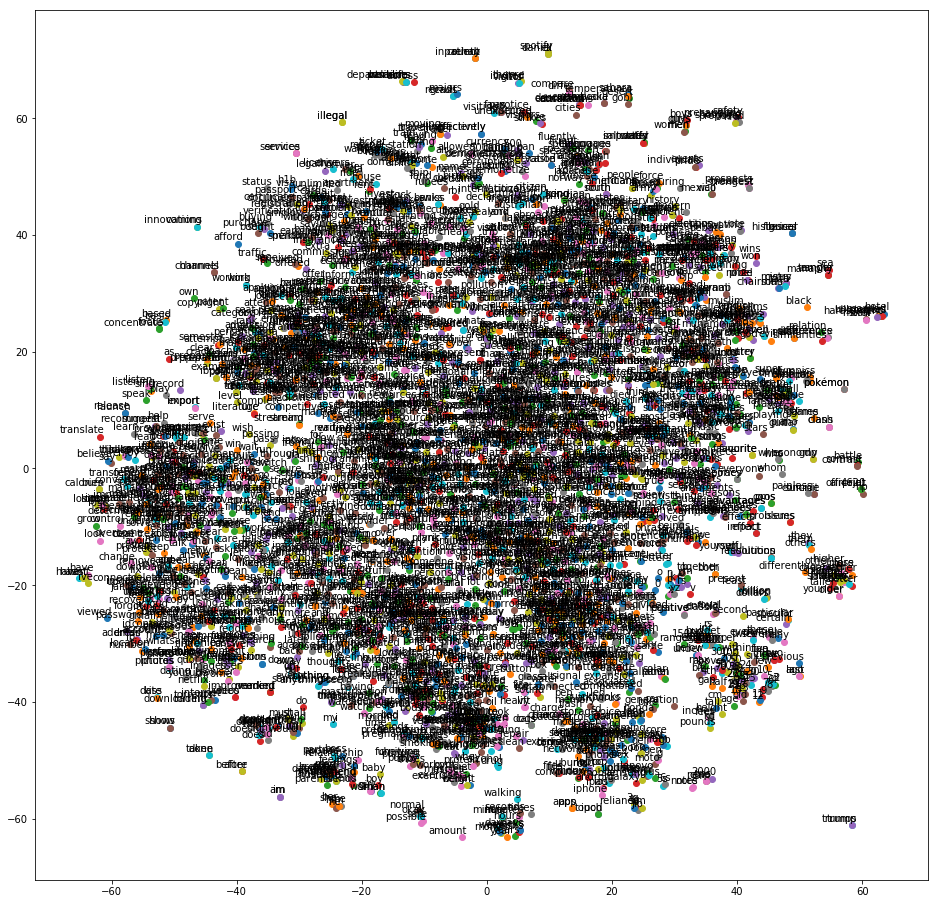

In [44]:
tsne_plot(model)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


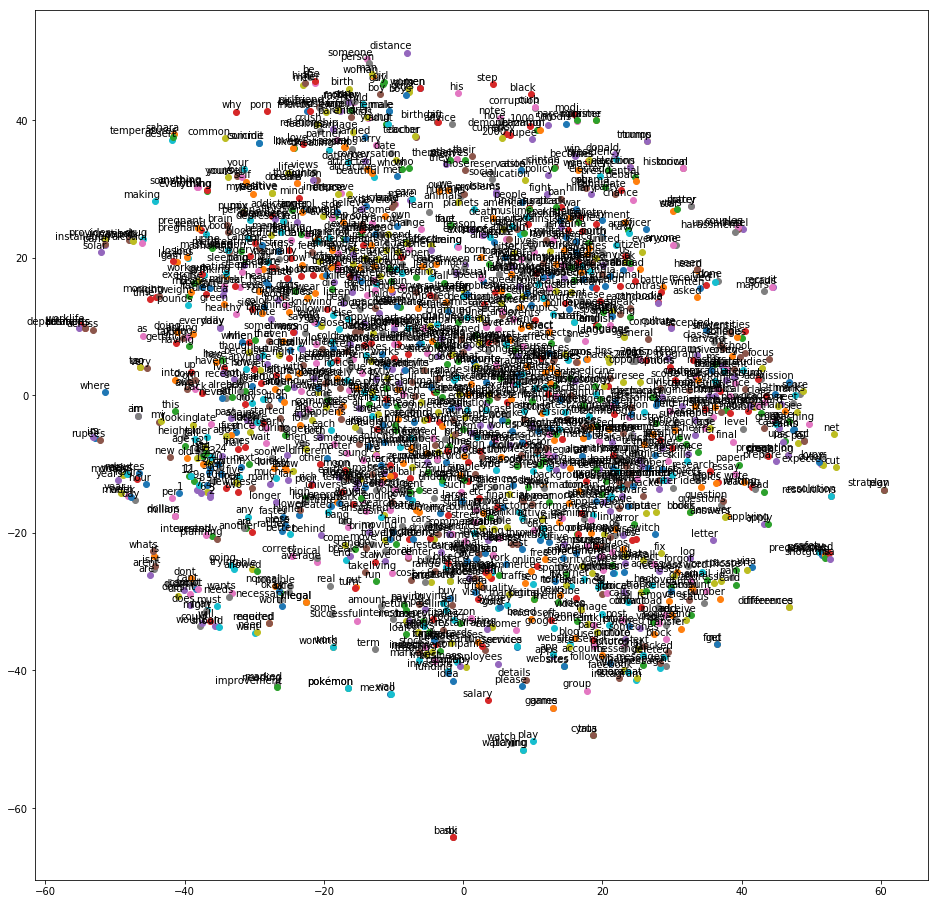

In [45]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


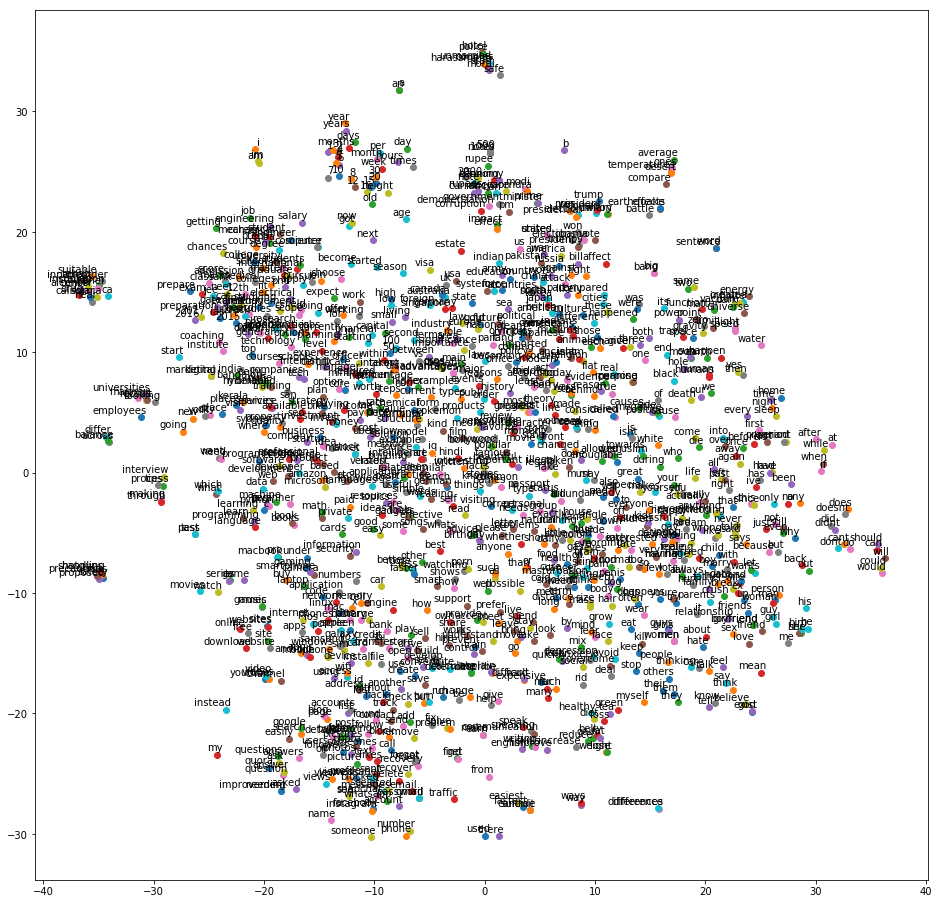

In [28]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [64]:
model.most_similar('algorithms')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('analysis', 0.7453732490539551),
 ('javascript', 0.6226180791854858),
 ('java', 0.5980263948440552),
 ('python', 0.5950121879577637),
 ('c', 0.5763789415359497),
 ('systems', 0.566515326499939),
 ('resources', 0.5590957403182983),
 ('cloud', 0.5439544916152954),
 ('tools', 0.5346469283103943),
 ('beginners', 0.5256874561309814)]

In [65]:
model.most_similar('universe')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('energy', 0.6915627717971802),
 ('space', 0.6506297588348389),
 ('planet', 0.6339156031608582),
 ('bang', 0.6280567646026611),
 ('light', 0.6190253496170044),
 ('god', 0.6146358847618103),
 ('earth', 0.6025119423866272),
 ('infinite', 0.599648654460907),
 ('humans', 0.5989764928817749),
 ('vacuum', 0.591281533241272)]